In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import fbprophet
import warnings

In [29]:
# Get File Directory
WORK_DIR = os.getcwd()

In [30]:
# Remove Deprecation Warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [31]:
# Loading the json data as python dictionary
DATA = pd.read_csv(WORK_DIR + "/daily_orders.csv")
DATA['y'], lam = boxcox(DATA['value'])
DATA['ds'] = DATA['date']

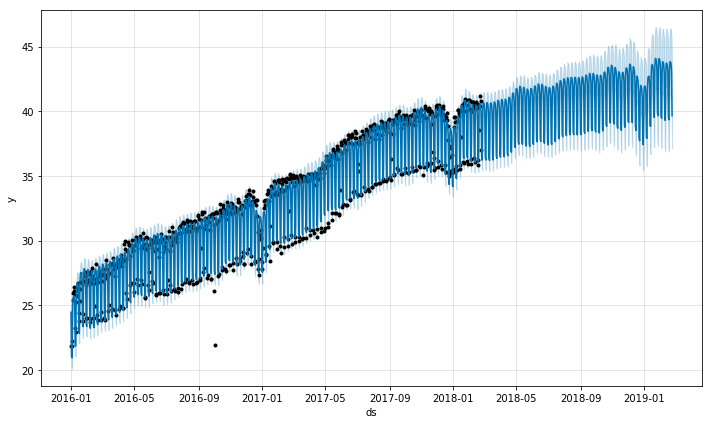

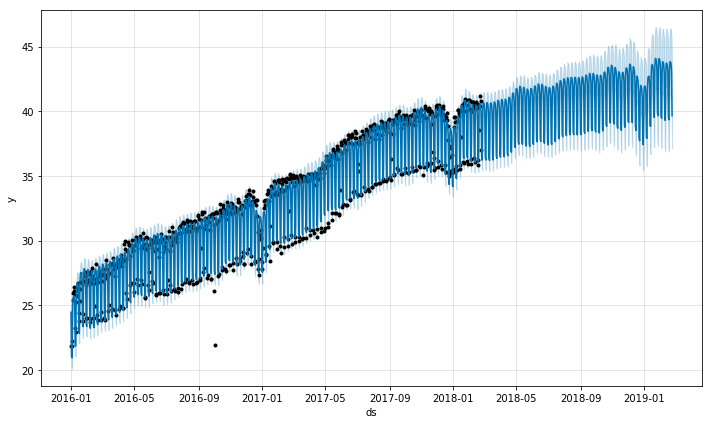

In [32]:
# Creating Forecast
MYFORECAST = fbprophet.Prophet(daily_seasonality=True)
MYFORECAST.fit(DATA)
FUTURE = MYFORECAST.make_future_dataframe(periods=365)

FORECAST = MYFORECAST.predict(FUTURE)
MYFORECAST.plot(FORECAST)

In [33]:
# Apply inverse Box-Cox transform to specific forecast columns
FORECAST[['yhat', 'yhat_upper', 'yhat_lower']] = FORECAST[[
    'yhat', 'yhat_upper', 'yhat_lower'
]].apply(lambda x: inv_boxcox(x, lam))

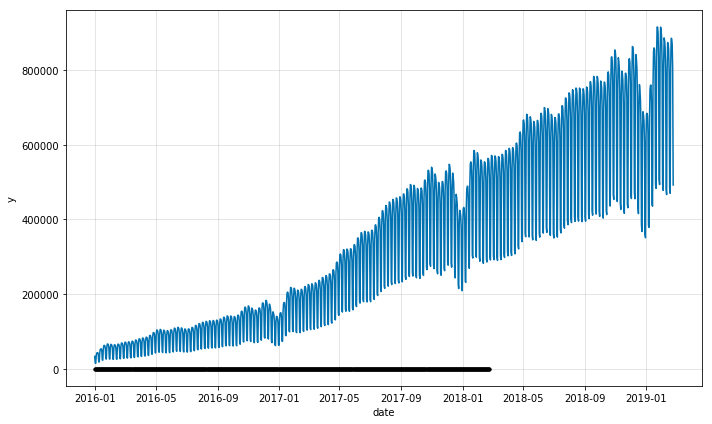

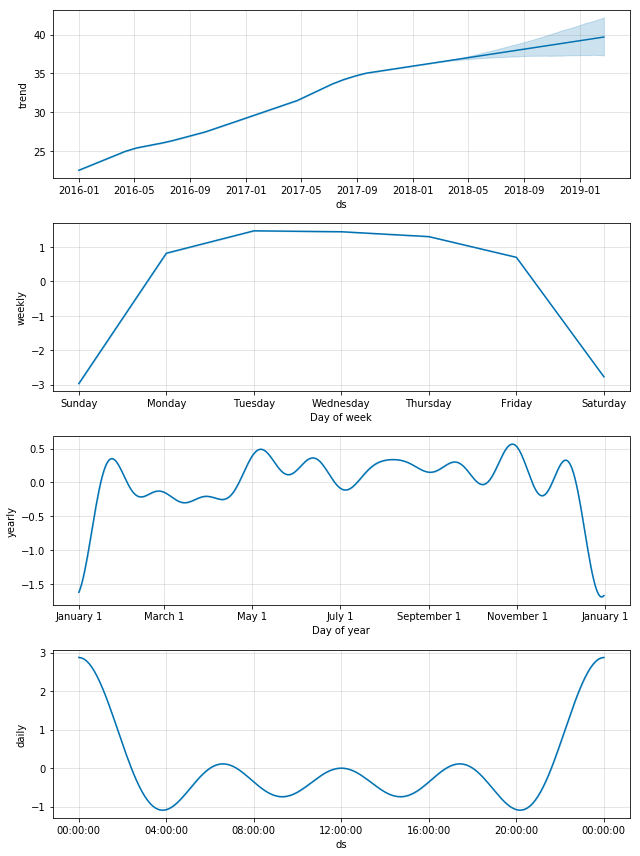

In [34]:
# Plot Forecast
MYFORECAST.plot(FORECAST, uncertainty=False, xlabel='date')
MYFORECAST.plot_components(FORECAST)

plt.show()
